In [166]:
# Importamos el pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [226]:
#Cargamos la base de datos de IRIS para crear el dataframe
df = pd.read_csv("IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [121]:
print(df["species"].unique())  # Ver todas las clases en la columna species

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [228]:
df["species"] = df["species"].str.strip()  # Elimina espacios extras
df["species"] = df["species"].str.lower()  # Convierte todo a minúsculas

In [230]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,iris-setosa
1,4.9,3.0,1.4,0.2,iris-setosa
2,4.7,3.2,1.3,0.2,iris-setosa
3,4.6,3.1,1.5,0.2,iris-setosa
4,5.0,3.6,1.4,0.2,iris-setosa


##### Dado que solo requerimos de dos tipos "Iris-setosa" e Iris-versicolor", tendremos que eliminar el "Iris-virginica"

In [264]:
# Filtrar solo Iris-setosa (0) e Iris-versicolor (1), ya que la opcion de Iris-verginica no la necesitaremos
df = df[df["species"].isin(["iris-setosa", "iris-versicolor"])]

# Convertir la variable de salida a valores numéricos
inputs = df[["sepal_length", "petal_length"]].values
labels = df["species"].map({"iris-setosa": 0, "iris-versicolor": 1}).values

#Mostrar valores
print("Primeras entradas:\n", inputs[:5])
print("Primeras salidas:\n", labels[:5])

Primeras entradas:
 [[5.1 1.4]
 [4.9 1.4]
 [4.7 1.3]
 [4.6 1.5]
 [5.  1.4]]
Primeras salidas:
 [0 0 0 0 0]


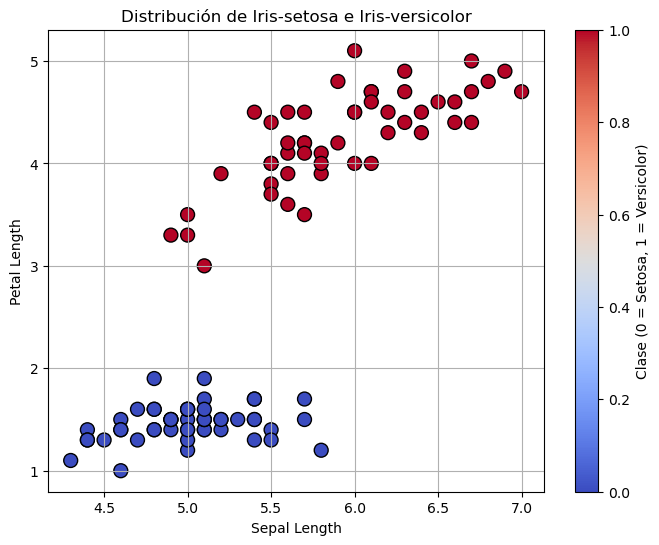

In [236]:
# Crear la figura
plt.figure(figsize=(8, 6))

# Graficar los datos, con colores diferentes para cada clase
plt.scatter(inputs[:, 0], inputs[:, 1], c=labels, cmap='coolwarm', marker='o', s=100, edgecolors='k')

# Personalizar la gráfica
plt.title("Distribución de Iris-setosa e Iris-versicolor")
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.grid(True)

# Agregar barra de colores para entender las clases
cbar = plt.colorbar()
cbar.set_label("Clase (0 = Setosa, 1 = Versicolor)")

# Mostrar la gráfica
plt.show()


In [262]:
# Definicion de hiperparametros
learning_rate = 0.01
bias = 0.0
epochs = 50
weights = [0.356, 0.259] 

### Clase Perceptron

In [256]:
#Clase Perceptron
class Perceptron():
    def __init__(self, inputs, labels, learning_rate, weights, bias, epochs=20):
        self.inputs = inputs
        self.labels = labels
        self.learning_rate = learning_rate
        self.weights = weights
        self.bias = bias
        self.epochs = epochs

    #Funcion de activacion
    def activation(self, z):
        return 1 if z > 0 else 0

    def predict(self, input_x, weights_ajustados, bias_weights):
        z = np.dot(input_x, weights_ajustados) + bias_weights
        y_pred = self.activation(z)
        return y_pred
    
    def fit(self):
        # Abrir un ciclo de acuerdo a las iteraciones (Epochs)
        for epoch in range(self.epochs):
            print(f"Epoch{epoch+1}/{self.epochs}", end = " ")

            #Variables para controlar el error en cada Epoch
            total_error = 0
            
            # Abrir otro ciclo para recorrer las entradas
            for input,label in zip(self.inputs, self.labels):
                #print(f"Input{input}, Label: {label}")
                # Calcular la funcion ponderada Z
                z = np.dot(input, self.weights) + self.bias
                #Calcular y predicha
                y_pred = self.activation(z)
                #Calculamos el error
                error = label - y_pred
                total_error += abs(error)
                #Calculamos el Delta W
                delta_w = self.learning_rate * error * input
                #Actualizar los weights
                self.weights = self.weights + delta_w
                #Actualziar el bias
                delta_bias = self.learning_rate * error
                self.bias = self.bias + delta_bias
                
            #Calcular el error promedio
            average_error = total_error/len(self.labels)
            print(f"Average Error: {average_error}")
            
        # Retornar los pesos y los bias actualizados
        return self.weights, self.bias

In [258]:
# Crear el objeto perceptron
perceptron = Perceptron(inputs, labels, learning_rate, weights, bias, 3)

#Entrenar el perceptron
w, b = perceptron.fit() 
print(f"Weights fit: {w}, Bias fit:{b}")

Epoch1/3 Average Error: 0.1
Epoch2/3 Average Error: 0.01
Epoch3/3 Average Error: 0.0
Weights fit: [-0.066  0.157], Bias fit:-0.09


In [260]:
print(f"[5.1,1.4] --> {'iris-setosa' if perceptron.predict([7.3,4.1], w,b) == 1 else 'iris-versicolor'}")
print(f"[4.9, 1.4] --> {'iris-setosa' if perceptron.predict([7,4.7], w,b) == 1 else 'iris-versicolor'}")
print(f"[4.7,1.3] --> {'iris-setosa' if perceptron.predict([1.9,1.1], w,b) == 1 else 'iris-versicolor'}")

[5.1,1.4] --> iris-setosa
[4.9, 1.4] --> iris-setosa
[4.7,1.3] --> iris-versicolor
